# 描述空间的工具：向量

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

---

## 1. 重温向量

## 2. 列向量

## 3. 基于Python语言的向量表示

在Python中，最重要，也是最常用的一个库就是数学计算库 Numpy，它也是我们这门课中最主要python工具包。下面我们将使用numpy库来实现矩阵的创建。

- 创建numpy数组（向量）

In [36]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(a)

[[1 2 3 4]]


- 获取变量的数据类型

In [17]:
display(A)

array([1, 2, 3, 4])

值得注意的是display() 函数是IPython的内置函数，仅适合用于Jupyter Notebook 和 JupyterLab。IPython是python的交互式shell界面。

下面，我们还可以使用python的内置函数type实现对数据类型的查看 。

In [18]:
type(A)

numpy.ndarray

## 4. 列向量的生成

前面我们已经提到在机器学习及大多数计算机的任务中，我们需要处理的都是以列形式存在的列向量，而numpy默认生成的是一个行向量。因此，我们需要对生成的向量进行一定转换。具体而言，我们需要将numpy生成的行向量转换成列向量。此处，最容易也是最直接的方法就是使用矩阵的转置(transpose)。

值得注意的是，在计算机的`存储意识`中，`向量`是一个一维的量，它只在一个维度上具有值。因此，无法进行转置（可理解为90度的方向转换，从行向量转换为列向量）。

幸运的是，我们可以将一维的向量理解成一个二维矩阵，只不过矩阵的某个维度值为1。
- 当我们使用**向量**来表示一个数据时，可以表示为: $\vec{A} = [a_1, a_2,..., a_n]$, 此时，$\vec{A}$ 是一个维度为 1，长度为 $n$ 的数据（向量）; 
- 而当我们使用**矩阵**来表示这个向量时，则可以表示为: $\vec{A_2} = [a_{11}, a_{12},...,a_{1n}]$， 此时 $\vec{A_2}$ 是一个维度为2的数据（矩阵），第一个维度长度为 1，第二个维度长度为 $n$，我们也可以将这样的矩阵理解为一个**行向量**，`一行n列`，形态为：$1 \times n$ (1, 4)。
- 在转换为二维矩阵后，我们就可以通过矩阵的转置实现`行向量`向`列向量`的转换，此时的数据 $\vec{A_2}$ 将转变为一个列向量 $\vec{B_2} ，`n行一列`，形态为：$n \times 1$ (4, 1) ，表示为: $\vec{A_3} = [a_{11}; a_{21};...;a_{n1}]$。

在Python中，有两种很直接的`行列转换`方式，他们都可以实现矩阵的转置：A.transpose() 和 A.T。（*注意，我们前面介绍过，矩阵转置对于向量是无效的。*）


### - 直接使用一维向量进行转换

In [2]:
import numpy as np
A = np.array([2, 2, 3, 4])
B = A.transpose()
C = A.T

print('a={}'.format(A))
print('A={}'.format(B))
print('B={}'.format(C))

a=[2 2 3 4]
A=[2 2 3 4]
B=[2 2 3 4]


In [58]:
print('A的形态: {}'.format(A.shape))
print('B的形态: {}; C的形态: {}'.format(B.shape, C.shape))

A的形态: (4,)
B的形态: (4,); C的形态: (4,)


### - 使用二维矩阵进行转换

In [59]:
import numpy as np
A2 = np.array([[1, 2, 3, 4]])
B2 = A2.transpose()
C2 = A2.T

print('A2={}'.format(A2))
print('B2={}'.format(B2))
print('C2={}'.format(C2))

A2=[[1 2 3 4]]
B2=[1 2 3 4]
C2=[1 2 3 4]


In [60]:
print('A2的形态: {}'.format(A2.shape))
print('B2的形态: {}; C2的形态: {}'.format(B2.shape, C2.shape))

A2的形态: (1, 4)
B2的形态: (4,); C2的形态: (4,)


**【结果分析】**

从上面 *“直接使用一维向量进行转换”* 的结果来看，原始的一维向量 $\vec{A}$  和经过 `.transpose()`和 `.T` 转换后的向量 $\vec{B}$ 和 $\vec{C}$ ，都呈现为相同的形态 (4, 1)，并且值也完全相同。这说明在Python中，**转置**在向量上是无效的。

当我们使用`二维矩阵`进行转换时，新生成的矩阵 $\vec{A_2}$ 是一个 $1 \times n$ 的二维矩阵，当经过 `.transpose()` 和 `.T` 转换后，两个矩阵都变成了 $n \times 1$ 的矩阵。这说明，原来以`二维矩阵`显示的**行向量**，形态为(1,4)；已经转换为以`二维矩阵`显示的**列向量**了，形态为(4, 1)。

> 值得注意的是，在Python中`一维向量`和`二维矩阵`的表示非常容易转换，只需要增加一层**中括号**"[ ]"就可以实现从`一维`到`二维`的转换。相似地，三维矩阵使用三层中括号表示，*n* 维矩阵使用 *n* 层中括号表示。下面给出一维向量和二维向量的表示。

```python
A = np.array([1, 2, 3, 4])
A2 = np.array([[1, 2, 3, 4]])
```


## 5. 向量的加法

要进行矩阵相加，前提是两个矩阵具有相同的形态（即 A.shape = B.shape）。矩阵的加法可以理解为两个矩阵对应元素的相加（按位相加），生成的结果矩阵维度保持不变（即(A+B).shape = A.shape = B.shape）。

给定两个 $n$ 维向量 $\vec{u}$ 和 $\vec{v}$ ，它们的加法运算规则可以表示为：

$
\begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ ... \\ u_n \end{bmatrix}
+
\begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ ... \\ v_n \end{bmatrix}
=
\begin{bmatrix} u_1+v_1 \\ u_2+v_2 \\ u_3+v_3 \\ ... \\ u_n+v_n \end{bmatrix}
$

向量加法的规则非常简单，下面给出一个例子，求解矩阵 $\vec{u} = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$ 和 $\vec{v} = \begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}$ 的**和**的运算结果。

按照运算规则可以表示为：

$
\vec{u}+\vec{v}=
\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}
+
\begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}
=
\begin{bmatrix} 1+5 \\ 2+6 \\ 3+7 \\ 4+8 \end{bmatrix}
=
\begin{bmatrix} 6 \\ 8 \\ 10 \\ 12 \end{bmatrix}
$

使用Python语言可以描述为：

In [69]:
import numpy as np
u = np.array([[1,2,3,4]]).T
v = np.array([[5,6,7,8]]).T
w = u + v

print('u={}\n\n v={}\n\n u+v={}'.format(u,v,w))

u=[[1]
 [2]
 [3]
 [4]]

 v=[[5]
 [6]
 [7]
 [8]]

 u+v=[[ 6]
 [ 8]
 [10]
 [12]]


对于`形态为` $1 \times n$ `的单行矩阵`和`行向量`的相加，也遵循**按位相加**的原则。

- 单行矩阵

In [70]:
import numpy as np
u = np.array([[1,2,3,4]])
v = np.array([[5,6,7,8]])
w = u + v

print('u={}\n\n v={}\n\n u+v={}'.format(u,v,w))

u=[[1 2 3 4]]

 v=[[5 6 7 8]]

 u+v=[[ 6  8 10 12]]


- 行向量

In [73]:
import numpy as np
u = np.array([1,2,3,4])
v = np.array([5,6,7,8])
w = u + v

print('u={}\n\n v={}\n\n u+v={}'.format(u,v,w))

u=[1 2 3 4]

 v=[5 6 7 8]

 u+v=[ 6  8 10 12]


## 6. 向量的数乘

**向量**的`数乘`，又称为向量的`数量乘法`，它表示的是一个`标量`和一个`向量`之间的乘积关系。与向量的加法类似，向量的数乘是由标量和向量中的**每个元素**依次相乘，生成的新向量与原来的向量具有`相同的形态`。向量的数乘从`几何`意义上来说，可以理解为向量沿着所在直线的方向拉升相应的倍数，拉升的**倍数**由`标量`决定，拉升的**方向**与原向量`方向`保持不变。

- 下面给出向量数乘的的几何示意图。

<Figure size 432x288 with 0 Axes>

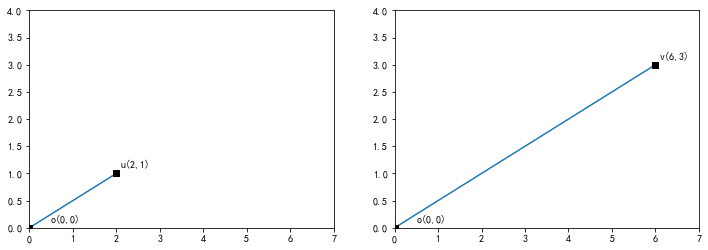

In [176]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

# Make the direction data for the arrows
o = np.array([0,0]) # 向量的起点坐标
u = np.array([2,1]) # 向量A的终点
v = 3*u # 向量B的终点

plt.figure(figsize=(12,4))

subplot(121)
plt.xlim(0,7)
plt.ylim(0,4)
plt.plot([o[0], u[0]], [o[1], u[1]])
plt.plot(o[0], o[1], 'ks')
plt.plot(u[0], u[1], 'ks')
plt.annotate('o(0,0)', xy = o, xytext = ([0.5, 0.1]))
plt.annotate('u(2,1)', xy = u, xytext = ([u[0]+0.1, u[1]+0.1]))

subplot(122)
plt.xlim(0,7)
plt.ylim(0,4)
plt.plot([o[0], v[0]], [o[1], v[1]])
plt.plot(o[0], o[1], 'ks')
plt.plot(v[0], v[1], 'ks')
plt.annotate('o(0,0)', xy = o, xytext = ([0.5, 0.1]))
plt.annotate('v(6,3)', xy = v, xytext = ([v[0]+0.1, v[1]+0.1]))

plt.show()

**【结果分析】**

从上图可以看到向量 $\vec{u}$ 和 向量 $\vec{v}=3*\vec{u}$ 的几何示意图，两个向量具有相同的方向，但具有不同的长度。向量 $\vec{v}=3*\vec{u}$ 的长度刚好是向量 $\vec{u}$ 的3倍。 

---

给定一个 $n$ 维向量 $\vec{u}$ 和一个标量 *v*，它们的数乘变换运算规则可以表示为：

$
c*\vec{u}=
c*\begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ ... \\ u_n \end{bmatrix}
= 
\begin{bmatrix} c*u_1 \\ c*u_2 \\ c*u_3 \\ ... \\ c*u_n \end{bmatrix}
$

下面给出一个向量数乘的例子：

给定标量5和向量$\vec{u}=\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$，可以得到它们的数乘结果为：
$
5*\vec{u}=
\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}
=5*
\begin{bmatrix} 5*1 \\ 5*2 \\ 5*3 \\ 5*4 \end{bmatrix}
=
\begin{bmatrix} 5 \\ 10 \\ 15 \\ 20 \end{bmatrix}
$。

使用Python语言可以描述为：

In [2]:
import numpy as np
u = np.array([[1,2,3,4]]).T
res = 5*u
print(res)

[[ 5]
 [10]
 [15]
 [20]]


**【结果分析】**

向量的数乘是没有方向的，无论左乘还是右乘都具有相同的效果，这意味着 $\vec{u}*v = v*\vec{u}$。这个结论，可以轻松推广到矩阵的数乘。

## 7. 向量间的乘法：内积和外积

向量间的乘法分为内积和外积两种形式，这两种形式具有较大的差异，下面我们依次介绍。

### 7.1 向量间的内积

In [178]:
import numpy as np
u = np.array([2,4,6])
v = np.array([1,3,5])
print(np.dot(u,v))

44


In [181]:
import numpy as np
u = np.array([[2,4,6]])
v = np.array([[1,3,5]])
print(np.dot(u,v))

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [180]:
import numpy as np
u = np.array([[2,4,6]]).T
v = np.array([[1,3,5]]).T
print(np.dot(u,v))

ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [179]:
import numpy as np
u = np.array([[2,4,6]])
v = np.array([[1,3,5]]).T
print(np.dot(u,v))

[[44]]


### 7.2 向量间的外积

In [183]:
import numpy as np
u = np.array([2,4])
v = np.array([1,3])
print(np.cross(u,v))

2


In [12]:
import numpy as np
u = np.array([1,1,1])
v = np.array([2,3]).T
print(np.cross(u,v))

[-3  2  1]


In [23]:
import numpy as np
u = np.array([2,3,4])
v = np.array([1,3,6])
print(np.cross(u,v))

[ 6 -8  3]


## 8. 向量的线性组合

In [26]:
import numpy as np
u = np.array([[1,2,3]]).T
v = np.array([[4,5,6]]).T
w = np.array([[7,8,9]]).T
print(2*u + 4*v + 6*w)

[[60]
 [72]
 [84]]


In [27]:
import numpy as np
u = np.array([1,2,3]).T
v = np.array([4,5,6]).T
w = np.array([7,8,9]).T
print(2*u + 4*v + 6*w)

[60 72 84]


In [5]:
import numpy as np
u = np.array([[1,2]]).T
v = np.array([[2,3]]).T
w = np.array([[3,4]]).T
print(1*u + 3*v + 5*w)

[[22]
 [31]]
